In [1]:
import PrIMe30

In [2]:

username = ''
password = ''

wh = PrIMe30.Warehouse(username, password)

User Authenticated


# Searching in PrIMe 3.0

In PrIMe 3.0 we are using Elasticsearch to find documents on the PrIMe Warehouse. Elasticsearch has many advantages from lightning-fast searches across large volumes of data to its distributed architecture. Search queries are made by passing a JSON strings through a RESTful API, but not to worry, these queries are generated for you in the ```generateMessage`` function. 

#### Using the Search Function

```SEARCH(OBJ, CATEGORY, FIELD, QUERY1, QUERY2)```
        
**CATEGORY** is a character string specifying the collection of the warehouse which will searched within. Default 'all'.
Other valid collections are listed below:

- all
- bibliography
- dataAttribute
- dataset
- element
- experiment
- instrumentalModel
- model
- optimizationVariable
- optimizationVariableBounds
- reaction
- reactionRate
- species
- surrogateModel
- thermodynamicData
- transportData

**FIELD** is a string specifying the field of the
category which will be queried. Each category has its own
unique fields but some fields, i.e. primeID , are shared
amongst all categories.

**QUERY** is a string containing a search query string.

## To find a species document with the name CH4

In [3]:
result = wh.search('species', 'name', 'ch4')
print(result)

['depository/species/catalog/s00009193.xml']


## Getting details of a document 

```GETXML(OBJ, PATHTO)```  
**PATHTO** as a string which is the location of XML document in the PrIMe Warehouse 



In [4]:
xml = wh.getXml(result[0])
print(xml)

<chemicalSpecies xmlns="http://purl.org/NET/prime/" xmlns:xsi="http://www.w3.org/2001/XMLSchema-instance" primeID="s00009193" xsi:schemaLocation="http://purl.org/NET/prime/                                      http://warehouse.primekinetics.org/schema/species.xsd"><copyright>©primekinetics.org 2005</copyright><content bibliography="b00014319" copyrighted="true" source="©NIST">Elements attributed to NIST are part of a collection copyrighted by NIST.</content><preferredKey group="prime" type="formula">CH4</preferredKey><chemicalIdentifier><name source="©NIST" type="CASRegistryNumber">74-82-8</name><name source="©NIST" type="formula">CH4</name><name source="©NIST">CH4</name><name source="©NIST">biogas</name><name source="©NIST">ch4</name><name source="©NIST">fire damp</name><name source="©NIST">marsh gas</name><name source="©NIST">methane</name><name source="©NIST">methyl hydride</name><name source="©NIST">r 50</name><name source="©NIST">un 1971</name><name source="©NIST">un 1972</name><n

## Saving document on our local machine 
```GETFILE(OBJ, PATHTO)``` 

**PATHTO** is a string of the location of file on the PrIMe Warehouse


In [5]:
wh.getFile(result[0])

s00009193.xml was saved in the current working directory.


## Get a count of the number of documents of a particular catagory  
```GETCOUNT(OBJ, COLLECTION)``` will return the number of documents in a collection in the PrIMe Warehouse

In [6]:
count = wh.getCount('depository/species/catalog')
count

11022

## Examples of search queries where multiple matching documents are returned 


In [7]:
result = wh.search('all', 'preferredKey', 'h2')
print(len(result))

result = wh.search('experiment', 'bibliography', 'hecht');
print(len(result))

result = wh.search('reaction', 'bibliography', 'zhang')
print(len(result))

result = wh.search('experiment', 'additionalDataItem', 'coal')
print(len(result))

2646
216
125
1024


## Check existance of a document
```EXIST(OBJ, PATHTO)``` will return a True or False if the specified document exists on the server or not

In [8]:
wh.exist('depository/bibliography/catalog/b00000290.xml')

File exists.


True

In [9]:
wh.exist('depository/bibliography/catalog/NOTAREALFILENAME.xml')

File does not exist.


False

## Get a list of all files in the specified path
```GETLIST(OBJ, COLLECTION)```

**COLLECTION** is a string specifiying the collection of the warehouse 

In [10]:
aa = wh.getList('depository/species/catalog')
len(aa) # Note: this gives the same result as count

11022

## Get Property from a specific document
```GETPROPERTY(OBJ, PATHTO, PROPERTYNAME)```

**PATHTO** is a string of the location of file on the PrIMe Warehouse

In [11]:
result = wh.getProperty('depository/bibliography/catalog/b00000290.xml', 'year')
print('year: ' + result[0])

result = wh.getProperty('depository/experiments/catalog/x00001327.xml', 'kind')
print('kind: ' + result[0])

result = wh.getProperty('depository/reactions/data/r00013869/rk00000036.xml', 'value')
print('value: ' + result[0])

result = wh.getProperty('depository/optimizationVariables/data/v00000144/vb00000001.xml', 'lower')
print('lowerBound: ' + result[0])

year: 1953
kind: shock tube
value: 1.7E-32
lowerBound: 0.63


## Get Property Names from a specific catagory
```GETPROPERTYNAMES(OBJ, CATEGORY)```

**CATEGORY** is a string of the category whose property names will be return the PrIMe Warehouse

In [12]:
result = wh.getPropertyNames('reactions')
print(result)

result = wh.getPropertyNames('experiment')
print(result)

result = wh.getPropertyNames('bibliography')
print(result)


[{'fieldName': 'any field', 'fieldType': 'text'}, {'fieldName': 'primeID', 'fieldType': 'text'}, {'fieldName': 'preferredKey', 'fieldType': 'text'}, {'fieldName': 'reversible', 'fieldType': 'text'}, {'fieldName': 'reactant_primeID', 'fieldType': 'text'}, {'fieldName': 'reactant_preferredKey', 'fieldType': 'text'}, {'fieldName': 'additionalDataItem', 'fieldType': 'text'}]
[{'fieldName': 'any field', 'fieldType': 'text'}, {'fieldName': 'primeID', 'fieldType': 'text'}, {'fieldName': 'preferredKey', 'fieldType': 'text'}, {'fieldName': 'bibliography_primeID', 'fieldType': 'text'}, {'fieldName': 'bibliography_preferredKey', 'fieldType': 'text'}, {'fieldName': 'apparatus_kind', 'fieldType': 'text'}, {'fieldName': 'apparatus_mode', 'fieldType': 'text'}, {'fieldName': 'apparatus_property_name', 'fieldType': 'text'}, {'fieldName': 'apparatus_property_value', 'fieldType': 'text'}, {'fieldName': 'apparatus_property_description', 'fieldType': 'text'}, {'fieldName': 'commonProperties_property_name',

# Using Cantera and PrIMe 3.0

Two examples are shown below for an H$_2$/O$_2$ System. 

1) ignition delay target 

2) laminar flame speed 

## Example 1 - Ignition Delay

### Get Target Information
```GETTARGET(OBJ, PATHTOTARGET)```

***PATHTOTARGET*** is a string specifying the location of a dataAttribute file on the PrIMe 3.0 server. 

```getTarget``` returns a dictionary with all information needed to run a simulation 

In [11]:
# Get Quantity of Interest 
qoi = wh.getTarget('depository/dataAttributes/catalog/a00000412.xml')
qoi

{'derivedBy': 'maxConcentration',
 'derivedBy_speciesID': 's00010102',
 'derivedBy_speciesName': 'OH',
 'experiment_ID': 'x00001326',
 'experiment_type': 'shock tube',
 'indicator_name': ['temperature', 'pressure'],
 'indicator_units': ['K', 'bar'],
 'indicator_value': [1142.55, 15.0625],
 'observable_boundkind': 'relative',
 'observable_bounds': [0.45351, 2.205],
 'observable_units': 'µs',
 'observable_value': 169.67,
 'preferredKey': 'IG H2 - 412',
 'species_key': ['H2', 'O2', 'Ar'],
 'species_molFraction': [0.1254, 0.0157, 0.8589],
 'species_primeID': ['s00009809', 's00010295', 's00000049'],
 'species_units': ['mole fraction', 'mole fraction', 'mole fraction']}

### Parse Out Temperature, Pressure, MoleFraction


In [12]:
# Extract information from qoi

TIdx = qoi['indicator_name'].index('temperature')
PIdx = qoi['indicator_name'].index('pressure')

T = qoi['indicator_value'][TIdx]
P = qoi['indicator_value'][PIdx]

X = ''
for n in range(0, len(qoi['species_key'])):
    X = X + qoi['species_key'][n] + ':' + str(qoi['species_molFraction'][n])
    if n is not len(qoi['species_key']) - 1:
        X = X + ','

expValue = qoi['observable_value']

In [13]:
print(X)

H2:0.1254,O2:0.0157,Ar:0.8589


### Run Cantera 

In [14]:
import sys
import numpy as np
import cantera as ct

gas = ct.Solution('gri30.xml')
gas.TPX = T, P*101325, X
r = ct.IdealGasConstPressureReactor(gas)

sim = ct.ReactorNet([r])
time = 0.0
states = ct.SolutionArray(gas, extra=['t'])

print('%10s %10s %10s %14s' % ('t [s]','T [K]','P [Pa]','u [J/kg]'))
for n in range(100):
    time += 1.e-5
    sim.advance(time)
    states.append(r.thermo.state, t=time*1e3)
    print('%10.3e %10.3f %10.3f %14.6e' % (sim.time, r.T,
                                           r.thermo.P, r.thermo.u))

import matplotlib.pyplot as plt

# Calculate ignition delay as maximum OH
derivedBy = qoi['derivedBy_speciesName']
idx = np.where(states.X[:,gas.species_index(derivedBy)] == max(states.X[:,gas.species_index(derivedBy)]))

ignDelay = states.t[idx[0][0]]




     t [s]      T [K]     P [Pa]       u [J/kg]
 1.000e-05   1142.550 1526207.813   2.609139e+05
 2.000e-05   1142.550 1526207.813   2.609139e+05
 3.000e-05   1142.550 1526207.813   2.609138e+05
 4.000e-05   1142.551 1526207.813   2.609138e+05
 5.000e-05   1142.551 1526207.813   2.609137e+05
 6.000e-05   1142.551 1526207.813   2.609137e+05
 7.000e-05   1142.552 1526207.813   2.609136e+05
 8.000e-05   1142.552 1526207.813   2.609134e+05
 9.000e-05   1142.553 1526207.813   2.609133e+05
 1.000e-04   1142.554 1526207.812   2.609131e+05
 1.100e-04   1142.555 1526207.812   2.609128e+05
 1.200e-04   1142.557 1526207.812   2.609125e+05
 1.300e-04   1142.559 1526207.813   2.609121e+05
 1.400e-04   1142.561 1526207.813   2.609116e+05
 1.500e-04   1142.564 1526207.813   2.609110e+05
 1.600e-04   1142.568 1526207.813   2.609102e+05
 1.700e-04   1142.572 1526207.813   2.609092e+05
 1.800e-04   1142.578 1526207.813   2.609080e+05
 1.900e-04   1142.585 1526207.812   2.609066e+05
 2.000e-04   1142.594

Ignition Delay was 0.5 ms


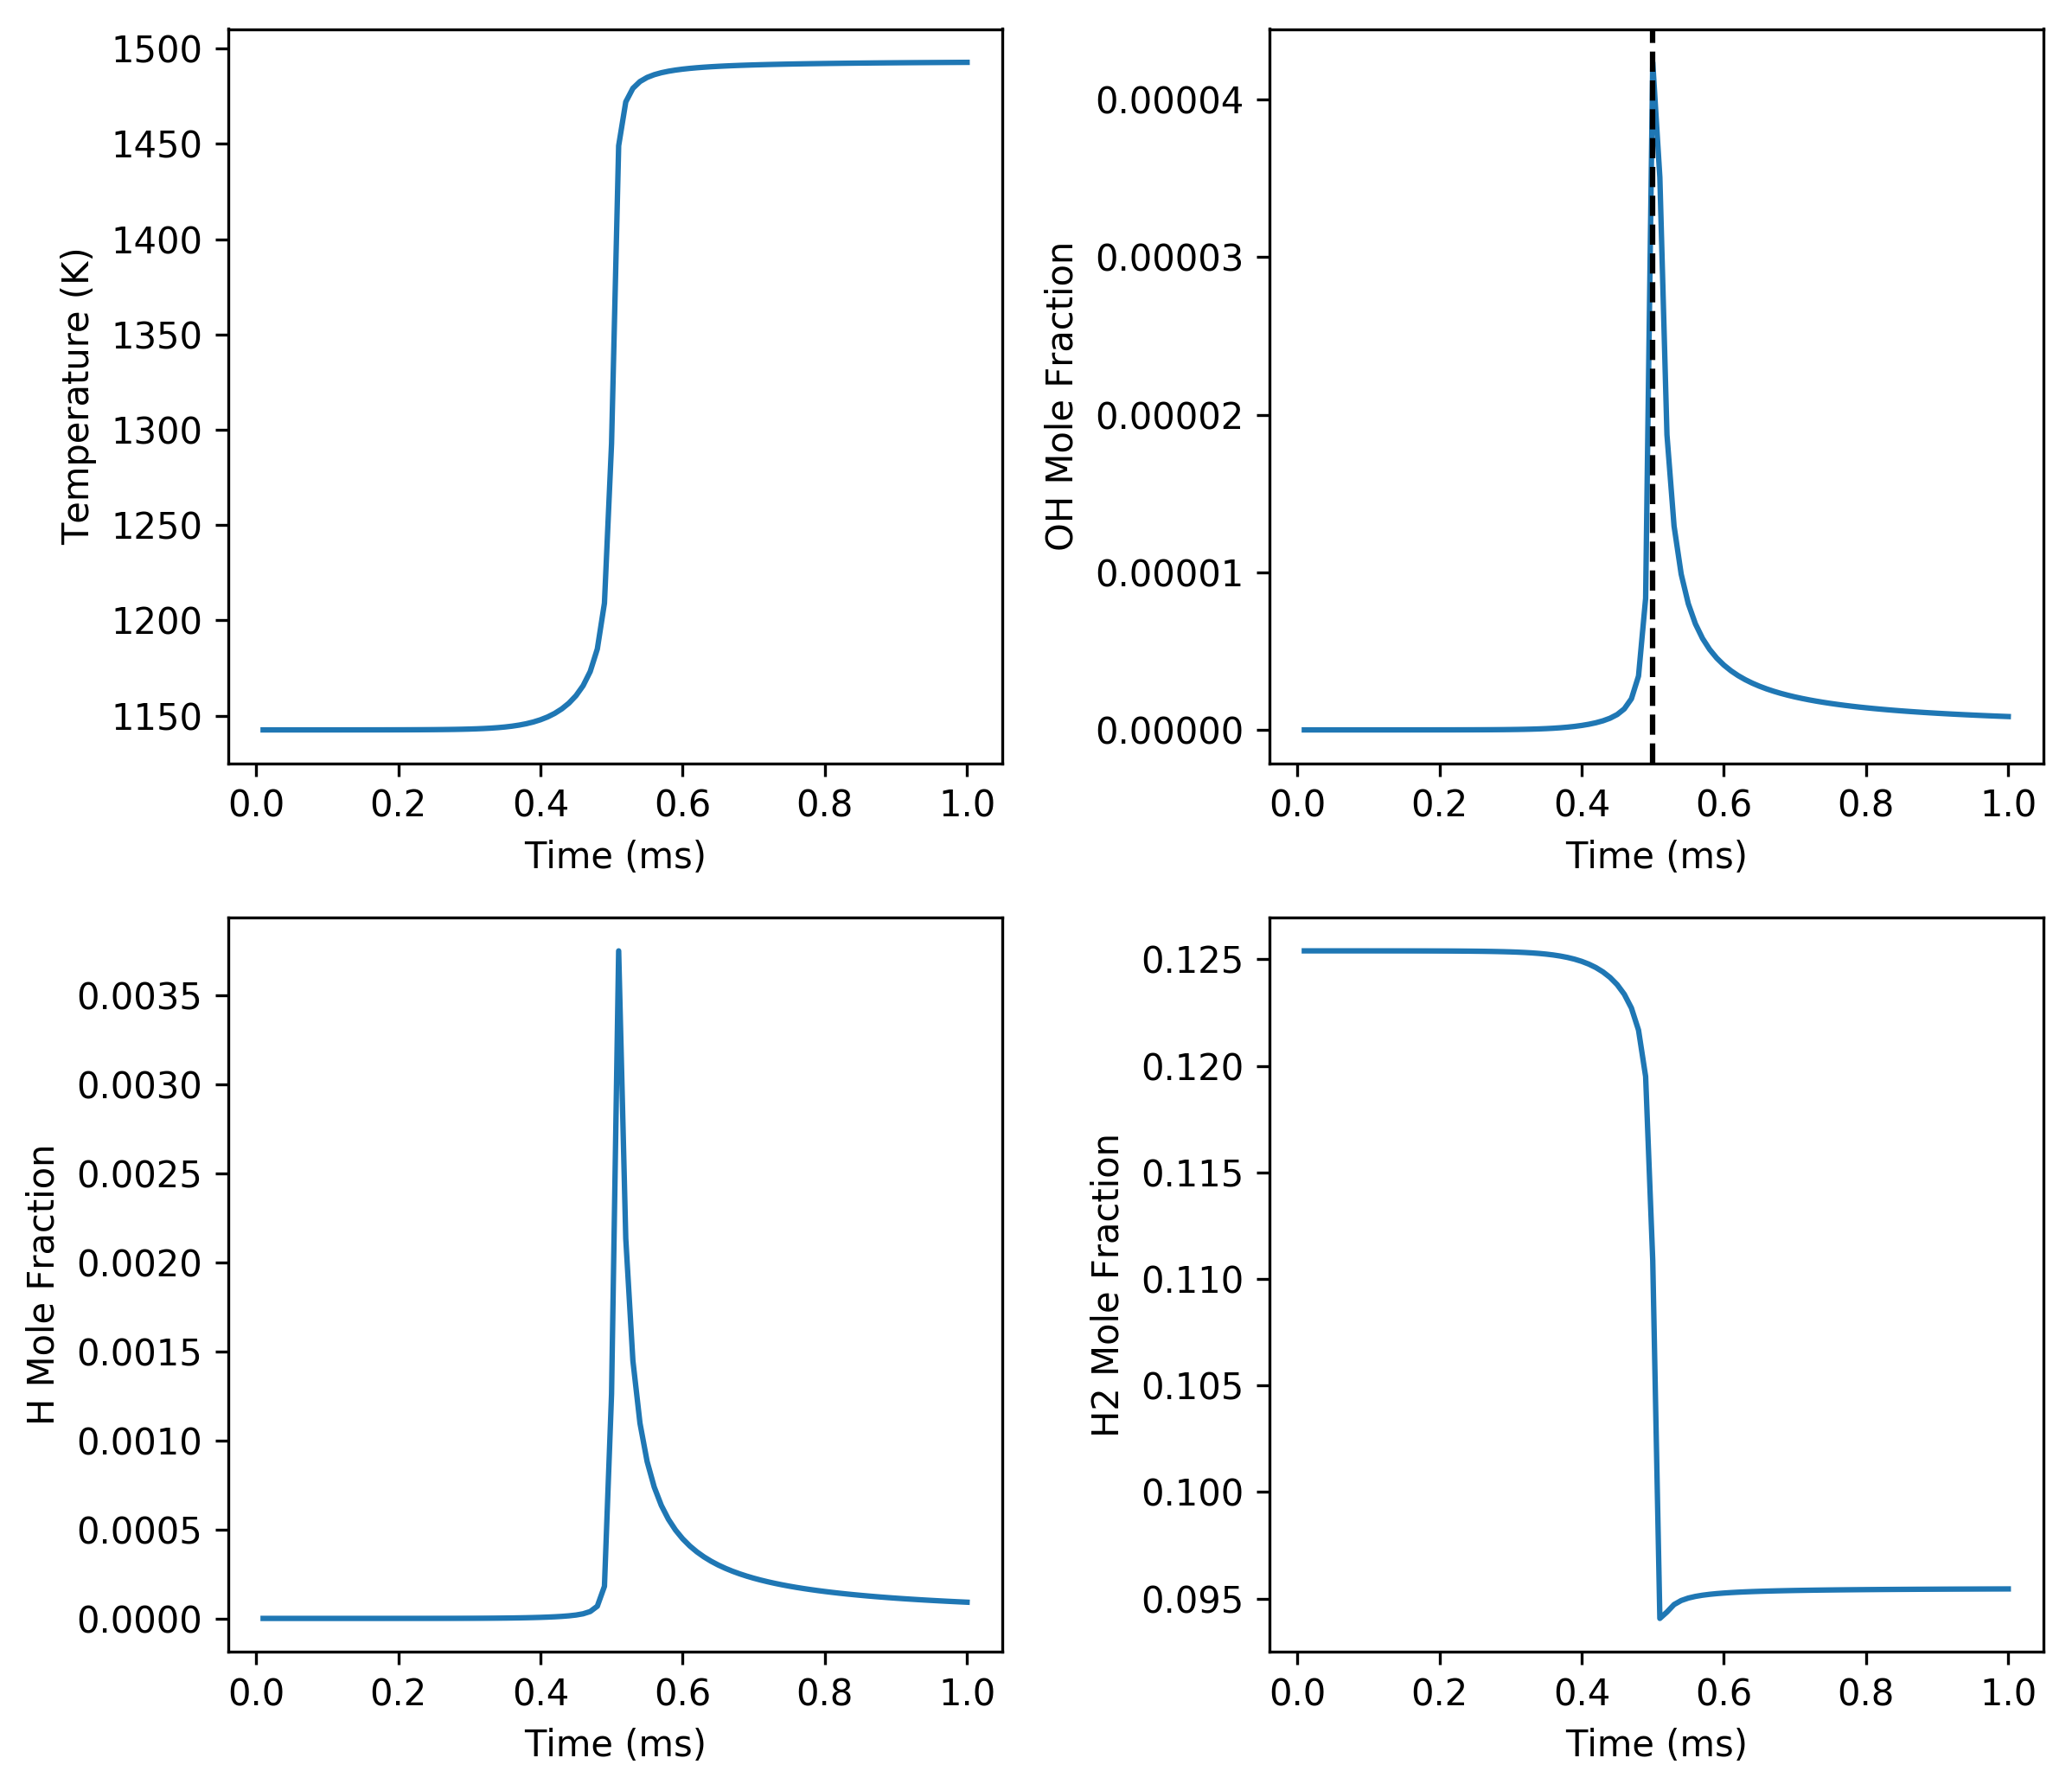

In [15]:
# Plot Results

print('Ignition Delay was ' + str(ignDelay) + ' ms') # ms
plt.figure(figsize=(8, 7), dpi=300, facecolor='w', edgecolor='k')
plt.clf()
plt.subplot(2, 2, 1)
plt.plot(states.t, states.T)
plt.xlabel('Time (ms)')
plt.ylabel('Temperature (K)')
plt.subplot(2, 2, 2)
plt.plot(states.t, states.X[:,gas.species_index(derivedBy)])
plt.axvline(ignDelay, color='k', linestyle='--')
plt.xlabel('Time (ms)')
plt.ylabel('OH Mole Fraction')
plt.subplot(2, 2, 3)
plt.plot(states.t, states.X[:,gas.species_index('H')])
plt.xlabel('Time (ms)')
plt.ylabel('H Mole Fraction')
plt.subplot(2, 2, 4)
plt.plot(states.t, states.X[:,gas.species_index('H2')])
plt.xlabel('Time (ms)')
plt.ylabel('H2 Mole Fraction')
plt.tight_layout()
plt.show()

## Example 2 - Laminar Flame Speed

### Run laminar flame speed in Cantera from getTarget results

In [16]:
# Get flame target

qoi = wh.getTarget('depository/dataAttributes/catalog/a00000476.xml')
#qoi = wh.getTarget('depository/dataAttributes/catalog/a00000476.xml')
qoi

{'experiment_ID': 'x00000178',
 'experiment_type': 'combustion chamber',
 'indicator_name': ['equivalence ratio',
  'pressure',
  'temperature',
  'flame speed'],
 'indicator_units': ['dimensionless', 'atm', 'K', 'cm/s'],
 'indicator_value': [0.6, 1.0, 298.0, 81.88],
 'observable_boundkind': 'relative',
 'observable_bounds': [0.833, 1.2],
 'observable_units': 'cm/s',
 'observable_value': 81.88,
 'preferredKey': 'H2 F - 476',
 'species_key': ['O2', 'H2', 'N2'],
 'species_molFraction': [0.16773, 0.20128, 0.63099],
 'species_primeID': ['s00010295', 's00009809', 's00010231'],
 'species_units': ['mole fraction', 'mole fraction', 'mole fraction']}

In [17]:
# Extract information from qoi

TIdx = qoi['indicator_name'].index('temperature')
PIdx = qoi['indicator_name'].index('pressure')
phiIdx = qoi['indicator_name'].index('equivalence ratio')

T = qoi['indicator_value'][TIdx]
P = qoi['indicator_value'][PIdx]
phi = qoi['indicator_value'][phiIdx]

X = ''
fuel_species= 'H2'
for n in range(0, len(qoi['species_key'])):
    if qoi['species_key'][n] != fuel_species: 
        X = X + qoi['species_key'][n] + ':' + str(qoi['species_molFraction'][n])
        if n is not len(qoi['species_key']) - 1:
            X = X + ','
        
expValue = qoi['observable_value']

In [18]:
# Simulation parameters

Tin = T  # unburned gas temperature [K]
width = 0.015  # m
loglevel = 1  # amount of diagnostic output (0 to 8)

gas = ct.Solution('gri30.xml')
gas.set_equivalence_ratio(phi, fuel_species, X)
reactants = gas.mole_fraction_dict()
gas.TP = (Tin, P*101325)

# Set up flame object
f = ct.FreeFlame(gas, width=width)
f.set_refine_criteria(ratio=2, slope=0.05, curve=0.05)
f.show_solution()
f.set_max_grid_points(f.domains[f.domain_index('flame')], 1e4)

# Solve with multi-component transport properties
#f.transport_model = 'Multi'
f.energy_enabled = True
#f.soret_enabled = True
f.solve(loglevel, refine_grid=True)
f.show_solution()
print('multicomponent flamespeed = {0:7f} cm/s'.format(f.u[0]*100))
results = f.u[0]*100 # cm/s



>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> reactants <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<

    Mass Flux:       0.9589 kg/m^2/s 
    Temperature:        298 K 
    Mass Fractions: 
                      H2      0.0173 
                      O2      0.2289 
                      N2      0.7538 



>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> flame <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<

    Pressure:   1.013e+05 Pa

-------------------------------------------------------------------------------
          z           u           V           T      lambda          H2 
-------------------------------------------------------------------------------
          0           1           0         298           0      0.0173 
      0.003           1           0         298           0      0.0173 
     0.0045           1           0         298           0      0.0173 
    0.00525       2.136           0       682.5           0     0.01298 
      0.006       3.271           0        1067           0    0.008654 
     0.00

In [19]:
print('multicomponent flamespeed = {0:7f} cm/s'.format(f.u[0]*100))

multicomponent flamespeed = 78.589839 cm/s


## Get Model Bounds and Reaction List 
 

In [24]:
pathToModel = 'depository/models/catalog/m00000007.xml'
[reactions, priorBounds] = wh.getModelBounds(pathToModel)

C:\Users\Jim\Dropbox\github\PrIMe30py\PrIMe30.py:335: UserWarning: Reaction :OH + OH = O + H2O has multiple bounds associated. Setting bounds to (0,0).
  'Reaction :' + reactionKey[i] + ' has multiple bounds associated. Setting bounds to (0,0).')
C:\Users\Jim\Dropbox\github\PrIMe30py\PrIMe30.py:335: UserWarning: Reaction :H2O2 + OH = H2O + HO2 has multiple bounds associated. Setting bounds to (0,0).
  'Reaction :' + reactionKey[i] + ' has multiple bounds associated. Setting bounds to (0,0).')


In [25]:
reactions

['H + O2 = O + OH',
 'O + H2 = H + OH',
 'O + H2 = H + OH',
 'OH + OH = O + H2O',
 'H2 = 2H',
 'O + O = O2',
 'O + H = OH',
 'OH + H = H2O',
 'O2 + H + (M) = HO2 + (M)',
 'O2 + H2 = HO2 + H',
 'HO2 + H = 2OH',
 'HO2 + O = O2 + OH',
 'O2 + H2O = HO2 + OH',
 '2HO2 = H2O2 + O2',
 '2OH = H2O2',
 'H2O2 + H = H2O + OH',
 'H2O2 + H = HO2 + H2',
 'H2O2 + O = OH + HO2',
 'H2O2 + OH = H2O + HO2']

In [26]:
priorBounds

array([[  0.90909,   1.1    ],
       [  0.63   ,   1.58   ],
       [  0.5    ,   2.     ],
       [  0.     ,   0.     ],
       [  0.2    ,   5.     ],
       [  0.2    ,   5.     ],
       [  0.1    ,  10.     ],
       [  0.333  ,   3.     ],
       [  0.333  ,   3.     ],
       [  0.33333,   3.     ],
       [  0.33333,   3.     ],
       [  0.2    ,   5.     ],
       [  0.5    ,   2.     ],
       [  0.5    ,   2.     ],
       [  0.5    ,   2.     ],
       [  0.2    ,   5.     ],
       [  0.2    ,   5.     ],
       [  0.2    ,   5.     ],
       [  0.     ,   0.     ]])